In [7]:
from coremltools.models import datatypes
from coremltools.models.neural_network import NeuralNetworkBuilder
import coremltools as ct
import torch

In [6]:
tf_model = torch.load('Files/YOLO_model_traced.pt')

model = ct.converters

/Users/egorlogutov/Desktop/Github/CoreML_converter/venv/lib/python3.11/site-packages/torch/serialization.py:1007: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning)
  warnings.warn("'torch.load' received a zip file that looks like a TorchScript archive"


AttributeError: module 'coremltools.converters' has no attribute 'pytorch'

In [20]:


# Определение входного типа данных
input_image_type = ct.ImageType(
                                shape=(1, 224, 224, 3),  
                                scale=1/255.0,          
                                bias=[-0.5, -0.5, -0.5], 
                                color_layout='RGB')      


In [23]:
# Загрузка или создание модели PyTorch
import torch
import torchvision.models as models

model = models.resnet18(pretrained=True)
model.eval()

# Преобразование модели в трассированную форму
example_input = torch.rand(1, 3, 224, 224)  # Пример входного тензора для трассировки
traced_model = torch.jit.trace(model, example_input)

# Конвертация модели в Core ML с использованием ImageType
mlmodel = ct.convert(
    traced_model,
    inputs=[ct.ImageType(name="input_1",  # Имя входа, как оно будет видно в Xcode
                         shape=example_input.shape, 
                         scale=1/255.0, 
                         bias=[-0.5, -0.5, -0.5],
                         color_layout='RGB')]
)

# Сохранение модели
mlmodel.save("ResNet18.mlmodel")


When both 'convert_to' and 'minimum_deployment_target' not specified, 'convert_to' is set to "mlprogram" and 'minimum_deployment_targer' is set to ct.target.iOS15 (which is same as ct.target.macOS12). Note: the model will not run on systems older than iOS15/macOS12/watchOS8/tvOS15. In order to make your model run on older system, please set the 'minimum_deployment_target' to iOS14/iOS13. Details please see the link: https://coremltools.readme.io/docs/unified-conversion-api#target-conversion-formats
Running MIL backend_mlprogram pipeline: 100%|██████████| 12/12 [00:00<00:00, 424.42 passes/s]


ValueError: Image output, 'linear_0', must have rank 4. Instead it has rank 2

Ошибку, которую вы получили, вызвано тем, что при конвертации модели из PyTorch в Core ML нельзя явно указывать shape для выходных данных. В Core ML форма выходных данных автоматически выводится из формы входных данных и операций в модели. Это означает, что вы должны убрать параметр shape при настройке выходного ImageType.



Однако стоит отметить, что конвертация сложных моделей PyTorch в Core ML может столкнуться с некоторыми ограничениями, связанными с поддержкой определённых операций и слоёв в Core ML. Если ваша модель использует нестандартные слои или операции, которые Core ML не поддерживает напрямую, вам может потребоваться модифицировать модель или написать пользовательские слои для Core ML.








Это исключение указывает, что при конвертации модели в Core ML формат .mlmodel не поддерживается для определённых типов моделей, и вам нужно использовать формат .mlpackage. Это связано с тем, что в последних версиях coremltools были введены различия между традиционными нейронными сетями (Neural Network) и ML Program, которые предоставляют большую гибкость и мощность.

Что такое ML Program?
ML Program — это новый формат модели в Core ML, который поддерживает более сложные операции и конструкции, такие как условные выражения, циклы и динамические размеры. Этот формат был введён для обеспечения большей гибкости и поддержки сложных моделей машинного обучения.

Как сконвертировать модель в .mlpackage:
Вы можете следовать этим шагам для конвертации вашей модели PyTorch в .mlpackage с использованием последней версии coremltools.

In [12]:
# Загрузка или создание модели PyTorch
import torch
import torchvision.models as models

model = models.resnet18(pretrained=True)
model.eval()

# Преобразование модели в трассированную форму
example_input = torch.rand(1, 3, 224, 224)  # Пример входного тензора для трассировки
traced_model = torch.jit.trace(model, example_input)

# Конвертация модели в Core ML с использованием ImageType
mlmodel = ct.convert(
    traced_model,
    inputs=[ct.ImageType(name="input_1",  # Имя входа, как оно будет видно в Xcode
                         shape=example_input.shape,
                         scale=1/255.0,
                         bias=[-0.5, -0.5, -0.5],
                         color_layout='RGB')]
)

# Сохранение модели
mlmodel.save("ResNet18.mlpackage")

When both 'convert_to' and 'minimum_deployment_target' not specified, 'convert_to' is set to "mlprogram" and 'minimum_deployment_targer' is set to ct.target.iOS15 (which is same as ct.target.macOS12). Note: the model will not run on systems older than iOS15/macOS12/watchOS8/tvOS15. In order to make your model run on older system, please set the 'minimum_deployment_target' to iOS14/iOS13. Details please see the link: https://coremltools.readme.io/docs/unified-conversion-api#target-conversion-formats
Running MIL backend_mlprogram pipeline: 100%|██████████| 12/12 [00:00<00:00, 1566.16 passes/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


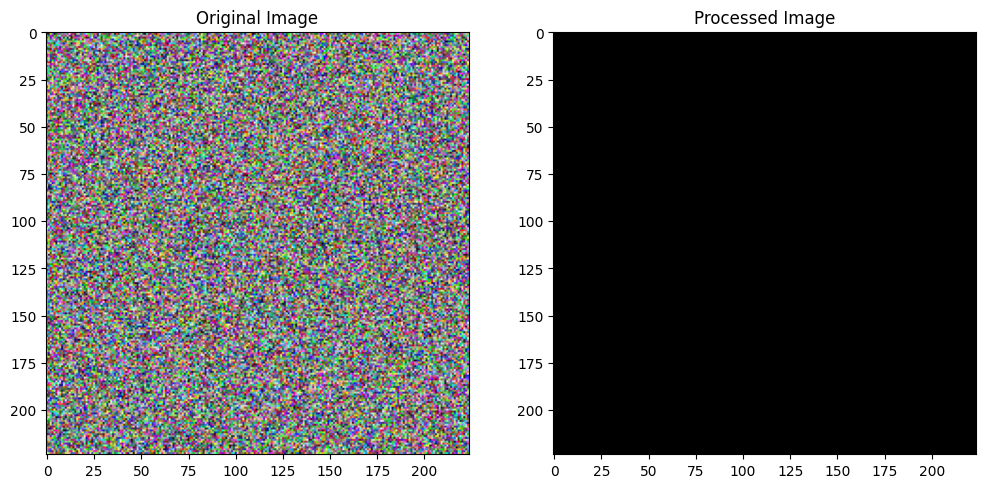

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Создание тестового изображения (224x224x3)
test_image = np.random.rand(224, 224, 3)

# Параметры из ImageType
scale = 1 / 255.0
bias = [-0.5, -0.5, -0.5]  # Пример смещения для RGB

# Применение масштаба и смещения
processed_image = test_image * scale + bias

# Отображение изображений
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(1, 2, 2)
plt.title("Processed Image")
plt.imshow(processed_image)
plt.show()


In [16]:
from PIL import Image

# Подготовка изображения для преобразования в PIL
# Обратите внимание, что нужно обратить масштабирование и смещение
normalized_image = (processed_image - np.array(bias)) * 255

# Корректировка значений пикселей, чтобы они были в диапазоне [0, 255]
normalized_image = np.clip(normalized_image, 0, 255)

# Преобразование типа данных в uint8 (необходимо для PIL)
normalized_image = normalized_image.astype(np.uint8)

# Создание объекта PIL.Image из массива NumPy
pil_image = Image.fromarray(normalized_image)

# Показ изображения
pil_image.show()


In [17]:
model = ct.models.MLModel('ResNet18.mlpackage')

# Выполнение предсказания
output = model.predict({'input_1': pil_image})

# Вывод результата
print(output)


{'linear_0': array([[-1.89819336e-01,  5.62988281e-01, -1.89355469e+00,
        -1.14843750e+00, -8.54492188e-01,  4.20654297e-01,
        -2.10156250e+00, -1.21093750e+00, -1.74511719e+00,
        -8.97949219e-01,  1.08593750e+00, -9.51660156e-01,
        -9.98535156e-01, -8.95507812e-01, -9.44824219e-01,
        -7.25585938e-01,  4.34875488e-02, -1.90136719e+00,
        -1.23242188e+00, -8.28613281e-01, -2.37915039e-01,
         1.63085938e+00,  1.17736816e-01, -4.22607422e-01,
        -9.46289062e-01, -2.73681641e-01,  8.94531250e-01,
         1.92749023e-01,  3.82324219e-01,  2.34741211e-01,
        -1.42773438e+00, -2.17163086e-01, -2.32666016e-01,
        -2.08203125e+00, -6.01562500e-01, -1.44335938e+00,
        -5.77636719e-01, -2.22851562e+00,  1.66601562e+00,
        -9.45312500e-01, -2.80761719e-01,  1.95800781e-01,
         4.64111328e-01,  1.50683594e+00,  1.08581543e-01,
         5.98144531e-01, -8.03222656e-01,  9.50683594e-01,
        -8.63281250e-01, -1.41796875e+00, -